In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

In [4]:
pd.set_option('display.mpl_style', 'default')

In [5]:
plt.rcParams['figure.figsize'] = (15, 5)

In [8]:
train_data = pd.read_csv('weibo_train_data.csv',sep='\t',parse_dates=['time'])

In [9]:
test_data = pd.read_csv('weibo_predict_data.csv',sep='\t',parse_dates=['time'])

In [11]:
train_data[:4]

,uid,mid,time,forward_count,comment_count,like_count,content
0,d38e9bed5d98110dc2489d0d1cac3c2a,7d45833d9865727a88b960b0603c19f6,2015-02-23 17:41:29,0,0,0,丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...
1,fa13974743d3fe6ff40d21b872325e9e,8169f1d45051e08ef213bf1106b1225d,2015-02-14 12:49:58,0,0,0,#丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪岩 一起发出的现金...
2,da534fe87e7a52777bee5c30573ed5fd,68cd0258c31c2c525f94febea2d9523b,2015-03-31 13:58:06,0,0,0,淘宝网这些傻逼。。。气的劳资有火没地儿发~尼玛，你们都瞎了
3,e06a22b7e065e559a1f0bf7841a85c51,00b9f86b4915aedb7db943c54fd19d59,2015-06-11 20:39:57,0,4,3,看点不能说的，你们都懂[笑cry]


In [13]:
test_data[:4]

,uid,mid,time,content
0,c01014739c046cd31d6f1b4fb71b440f,0cd5ef13eb11ed0070f7625b14136ec9,2015-08-19 22:44:55,Xah Emacs Tutorial http://t.cn/zWoY9IZ
1,fa5aed172c062c61e196eac61038a03b,7cce78a4ad39a91ec1f595bcc7fb5eba,2015-08-01 14:06:31,卖水果老人因没住处夜宿酒店门口 被车碾死 http://t.cn/RL0Hw8J （分享自@...
2,77fc723c196a45203e70f4d359c96946,a3494d8cf475a92739a2ffd421640ddf,2015-08-04 10:51:38,不要学习没有用的理论？ 不是：要学习，但要知道这个理论，为什么没有用？真实有用的理论是什么。...
3,e4097b07f34366399b623b94f174f60c,6b89aea5aa7af093dde0894156c49dd3,2015-08-16 14:59:19,[幸运之星] -恭喜！您的新浪微博账号已被系统确认为“新浪五周年”活动二等奖幸运用户。请登陆...


In [14]:
train_user_counts = train_data.groupby('uid').aggregate(sum)
train_user_counts

,forward_count,comment_count,like_count
uid,,,
000127c6126e2b0019f255ed21ac1cb7,1,0,0
0001565a5edece1669577e2ace9a6a3d,0,4,0
00033a6513b86b2705de9ffa9d37ffb6,0,0,1
0004fe2742507420eaa73e119dc83ac5,7,2,3
000c663a24a2f91f4ba156fcd4f8b9f2,2,33,48
000ce19d2fccb1f22421bec50bf25b08,0,0,0
000d7bf7406392b2212dfb4fe907d946,0,0,0
0012edb614365800e901c7f2b47e9129,0,4,0
001349a053bdecf1a71960f29288ced1,0,1,2


In [24]:
test_user_counts = test_data.groupby('uid').aggregate(sum)

In [22]:
train_data['uid'].value_counts()

875a4a77b339d93f819e2c4de5bd0b57    31015
0faddeeabf8b2cfd75afc6ad9c1ba2da    17160
7511e346911dd7d1e38f11485abb25c5    12013
c35d635cd9d875e63fcaff8e4f1398a9     7875
c60533fdb5278412b14379f693f77dd5     7801
7e1580aec30f4a3cff7005500a0faa67     7394
06fb6ad865dca45a038508bf5f98e4e8     6453
9946867fb7e729d3d7b5693ebe4274cd     5472
7634e89faee952e49bfb983de1a6518c     5196
7c074e805ce31948c39178b9993e99a5     4902
0220afe08e008b01ad36cc916df43ace     4570
5e666401d93147eea9823d48d124fd34     4405
23316968cf27ff3d1fdb51cf149bdaca     3903
7564bab83ea84e4c0985b023aac58c7d     3682
f14abc57f4f844c195284f5842370a32     3230
25142383d6e0964c18ef86f27c5572d4     3219
8846c9bed09b6402880409f49db0b448     3095
c4b747dca344890718884e10805be401     3020
b2a945452f34cb65a30ad668d2640179     2917
aeb6d9fc9a5becaa329dfda898b18ae9     2906
25ca1cea6595c04a5f009a11dd0e676b     2859
61417b46222ee28b1f534d4e7b14ad89     2697
ac4e754e41c3f328f1bf18c7fc381511     2477
97d783c2d3353568b472103bc0463d04  

In [23]:
test_data['uid'].value_counts()

7511e346911dd7d1e38f11485abb25c5    8150
0faddeeabf8b2cfd75afc6ad9c1ba2da    3202
875a4a77b339d93f819e2c4de5bd0b57    3034
c35d635cd9d875e63fcaff8e4f1398a9    1461
7e1580aec30f4a3cff7005500a0faa67    1375
c60533fdb5278412b14379f693f77dd5    1185
5e666401d93147eea9823d48d124fd34     974
25b187a76a9a6db0666da79fbc4922db     875
0220afe08e008b01ad36cc916df43ace     760
25142383d6e0964c18ef86f27c5572d4     671
23316968cf27ff3d1fdb51cf149bdaca     651
0f7c507a6b797f812bcf751ce8c9d1bb     606
97d783c2d3353568b472103bc0463d04     575
126a2678cea2b1e7b8bb54860cfd7f77     543
b057ec7ce0264696cecd74568ba03698     512
b2a945452f34cb65a30ad668d2640179     510
25ca1cea6595c04a5f009a11dd0e676b     489
f14abc57f4f844c195284f5842370a32     473
21150f89f43236654e461ebf14fc1c89     462
8846c9bed09b6402880409f49db0b448     458
c4b747dca344890718884e10805be401     420
aca2da8b53bbb1125d3108d8fd0ee281     418
7046c99d906f0f23e3c333a5a29e2f54     405
8ece96c79bea5974b045d53431228965     397
ede927d81b871bc7

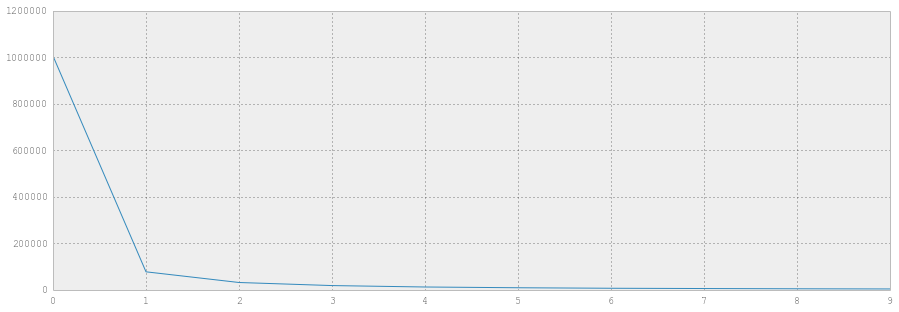

In [29]:
train_data['forward_count'].value_counts()[:10].plot()

In [30]:
user_counts_mean = data.groupby('uid').mean()

In [31]:
user_counts_mean

,forward_count,comment_count,like_count
uid,,,
000127c6126e2b0019f255ed21ac1cb7,0.500000,0.000000,0.000000
0001565a5edece1669577e2ace9a6a3d,0.000000,0.190476,0.000000
00033a6513b86b2705de9ffa9d37ffb6,0.000000,0.000000,0.017241
0004fe2742507420eaa73e119dc83ac5,0.152174,0.043478,0.065217
000c663a24a2f91f4ba156fcd4f8b9f2,0.016393,0.270492,0.393443
000ce19d2fccb1f22421bec50bf25b08,0.000000,0.000000,0.000000
000d7bf7406392b2212dfb4fe907d946,0.000000,0.000000,0.000000
0012edb614365800e901c7f2b47e9129,0.000000,0.571429,0.000000
001349a053bdecf1a71960f29288ced1,0.000000,0.200000,0.400000


In [36]:
user_counts_mean.to_csv('user_counts_mean.csv')

In [37]:
train_data[train_data['uid'] ==  "0004fe2742507420eaa73e119dc83ac5"]

,uid,mid,time,forward_count,comment_count,like_count,content
28082,0004fe2742507420eaa73e119dc83ac5,f5d314b95808647dec290116dfcbd585,2015-04-16 20:35:11,0,0,0,iOS开发之详解正则表达式 - 来自CocoaChina苹果开发中文站@CocoaChina...
48268,0004fe2742507420eaa73e119dc83ac5,264b72fc0a68e6d0a52d1d5bd0bf751f,2015-04-10 16:29:32,0,0,0,创建Material Design风格的Android应用--使用自定义动画: 动画在Mat...
132727,0004fe2742507420eaa73e119dc83ac5,1b3cc409807b764839c196d8f2d7aaa9,2015-03-16 09:22:53,0,0,0,swift通讯录 http://t.cn/RwkanTk
140813,0004fe2742507420eaa73e119dc83ac5,f3fcf73e4946e2a8c686e2b5c0c538bf,2015-06-04 21:08:09,0,0,0,自己回复一下，这个报错已经被leancloud修复了。——评论zoejblog「[Andro...
146477,0004fe2742507420eaa73e119dc83ac5,c8151c320ccb151783ba49b397a786ff,2015-02-11 10:40:47,0,0,0,#吴彦祖的红包#小年抢个好彩头！我在吳彥祖 的红包中抽到了@快的打车 提供的“快的打车6元红...
226997,0004fe2742507420eaa73e119dc83ac5,27e5e09a5335f7e43da2f51e3db3b148,2015-03-25 17:41:35,0,0,0,我分享了@Easy 的文章 http://t.cn/RA20O6K
304175,0004fe2742507420eaa73e119dc83ac5,89c26c30ff800012840dff38823749c8,2015-04-10 08:22:03,0,0,0,http://t.cn/RA6lyHf
306169,0004fe2742507420eaa73e119dc83ac5,c487dd4e8fb1282fcc1ce064d3681633,2015-04-10 16:29:59,0,0,0,创建Material Design风格的Android应用--使用自定义动画 | 码农明明桑...
334767,0004fe2742507420eaa73e119dc83ac5,c254e6c2ca1f6a02c0ba5d3e163c7ee7,2015-04-10 08:59:34,0,0,0,Android(Lollipop/5.0) Material Design(四) 定义阴影和...
364231,0004fe2742507420eaa73e119dc83ac5,e1d3465bd5787c2f4adbf9861002b05f,2015-07-07 08:38:51,0,0,0,直接拿来用！十大Material Design开源项目-CSDN.NET http://t....


In [38]:
test_data[test_data['uid'] ==  "0004fe2742507420eaa73e119dc83ac5"]

,uid,mid,time,content
10577,0004fe2742507420eaa73e119dc83ac5,8ae96addcbc13741bf1204defc0b34c1,2015-08-13 08:58:21,"「 五款app原型设计工具对比 」Proto.io, Pixate, Origami, Fr..."
66290,0004fe2742507420eaa73e119dc83ac5,349a3fdb7087c578ec19bdf0883d99bb,2015-08-29 19:14:23,这个网站，哈哈，你懂得 http://t.cn/RL0v09t
66731,0004fe2742507420eaa73e119dc83ac5,538a0efd6fc77b848a8d2342fb3cd8cd,2015-08-14 00:10:56,【视频：Mark Bezos:来自志愿消防员的一门课】 （分享自 @优酷） http://t...
83786,0004fe2742507420eaa73e119dc83ac5,f9e516aeb93cf921e2d81f73ac13ef1c,2015-08-03 09:43:19,如果让我重新设计一款Android App - 闻道有先后，术业有专攻，如是而已。 - 博客...
105237,0004fe2742507420eaa73e119dc83ac5,5848c5ce674cba6f042ca47d6518065e,2015-08-04 13:27:12,我们为什么需要动效设计 - 来自CocoaChina苹果开发中文站@CocoaChina h...
